In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
##import data
from sklearn.datasets import fetch_california_housing
california =fetch_california_housing()

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
california['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [5]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
## preparing data
dataset=pd.DataFrame(california.data, columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
dataset['Price']=california.target
dataset.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [40]:
first_row = dataset.iloc[0].values



[  8.3252      41.           6.98412698   1.02380952 322.
   2.55555556   4.526     ]


In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Price       20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [12]:
dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Price,0


In [13]:
## EDA
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


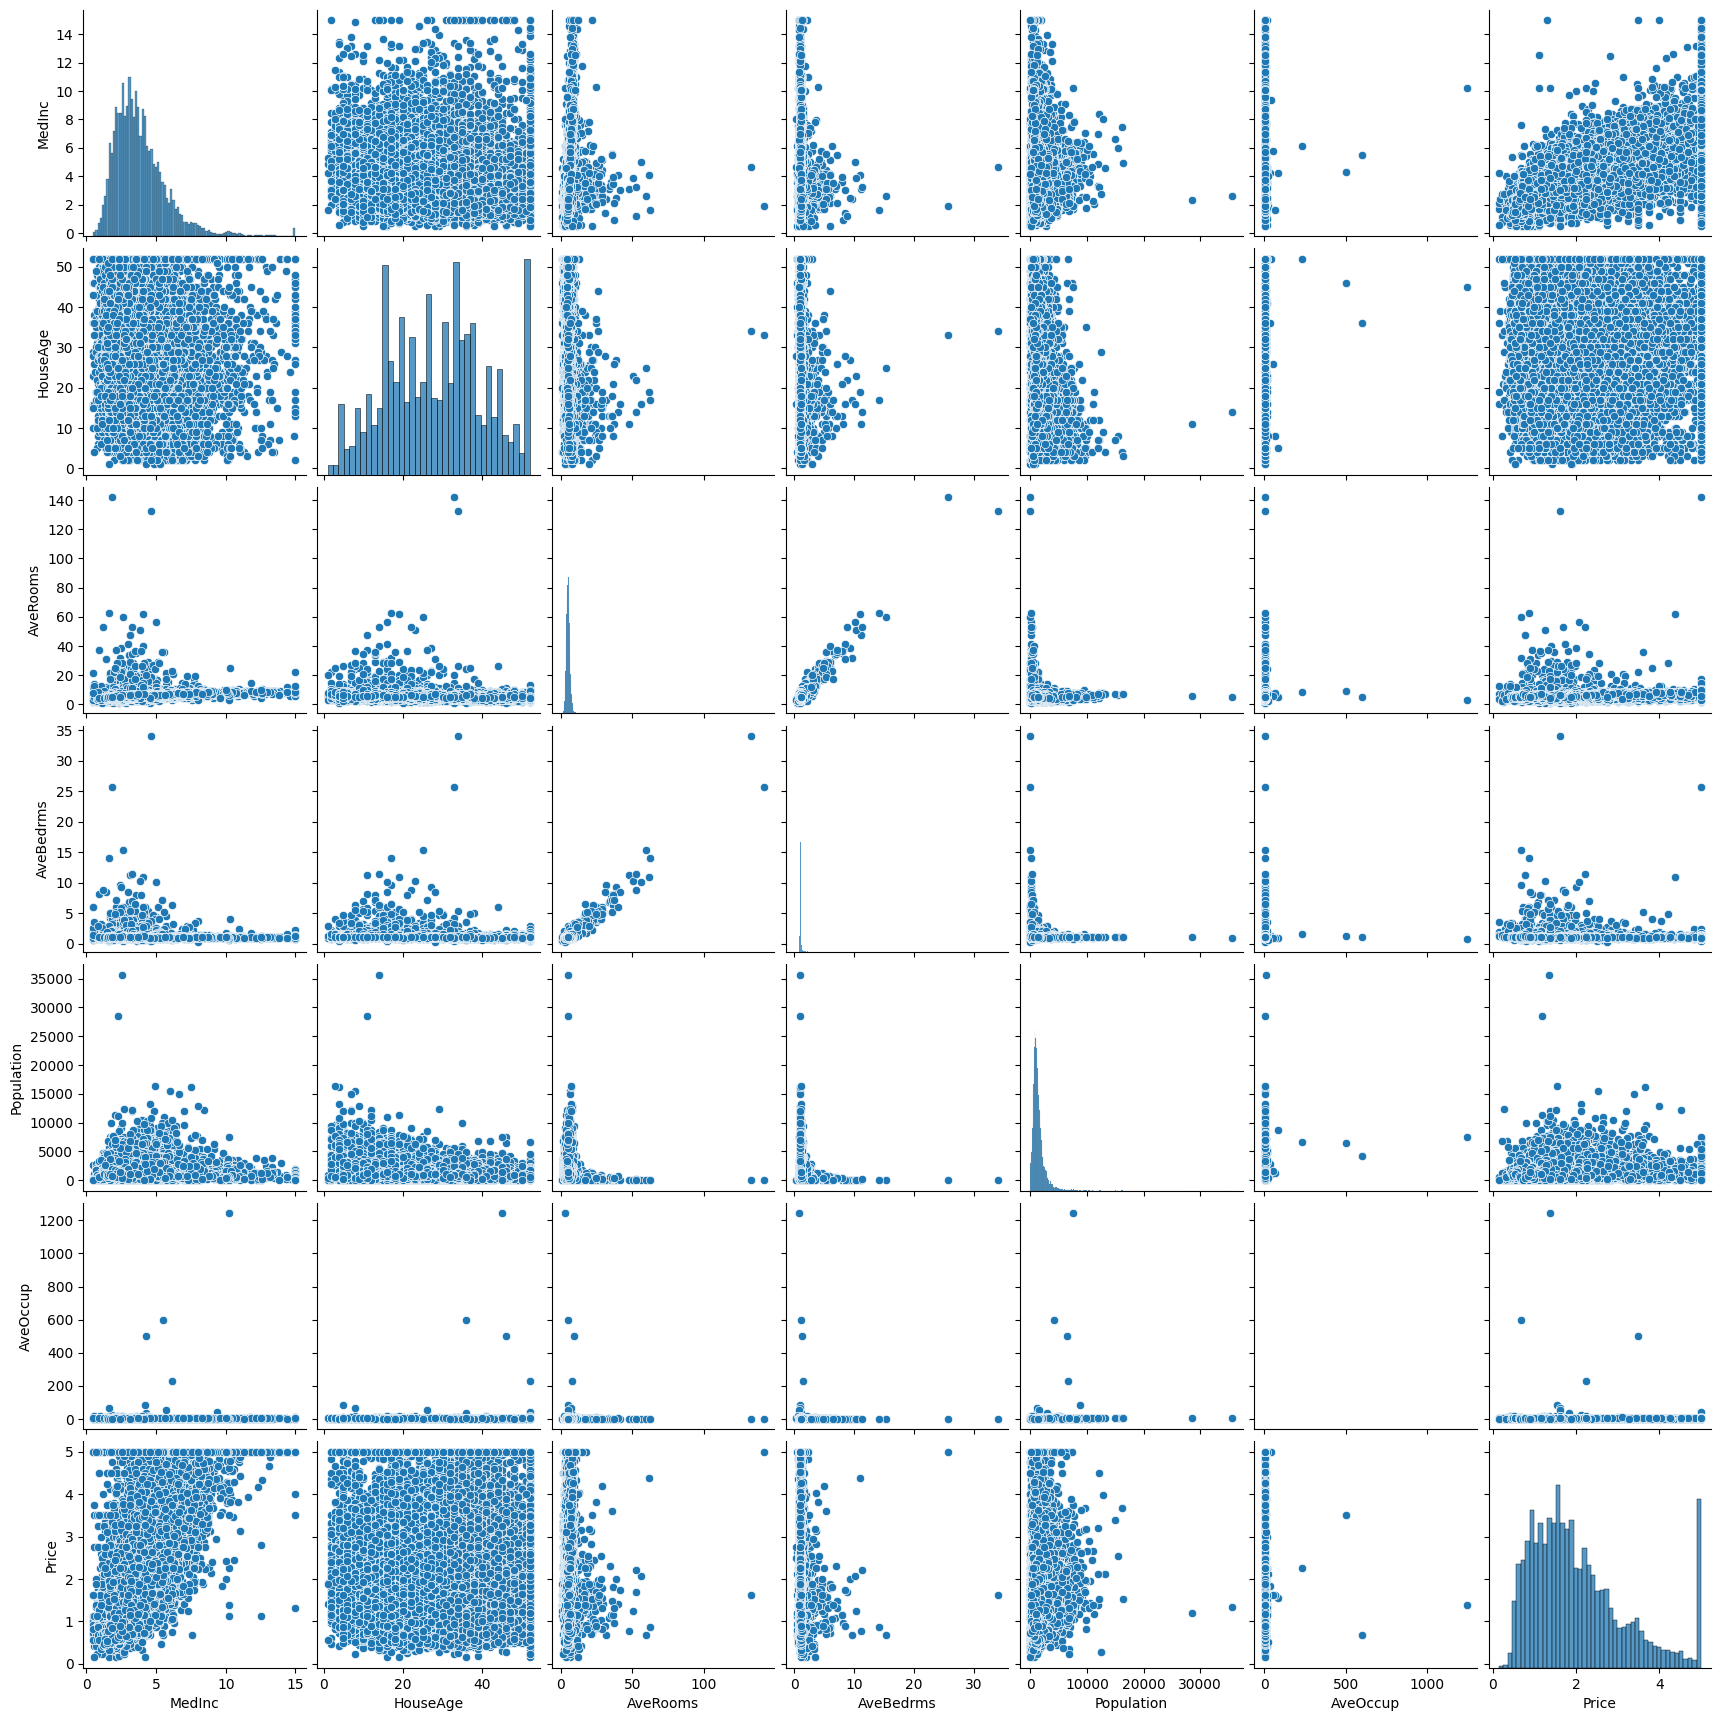

In [14]:
 import seaborn as sns
 sns.pairplot(dataset)

In [15]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [16]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [17]:
y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [57]:
from sklearn.preprocessing import StandardScaler
X = dataset[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]]
scaler = StandardScaler()
scaler.fit(dataset)

StandardScaler()

In [58]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [22]:
regression.fit(X_train,y_train)

LinearRegression()

In [23]:
regression.coef_

array([ 1.01860743,  0.20921935, -0.53812153,  0.48861478,  0.02467697,
       -0.06093612])

In [24]:
reg_pred = regression.predict(X_test)

In [25]:
reg_pred

array([1.24206003, 2.50746419, 1.97869163, ..., 1.93618697, 2.83052817,
       2.11164282])

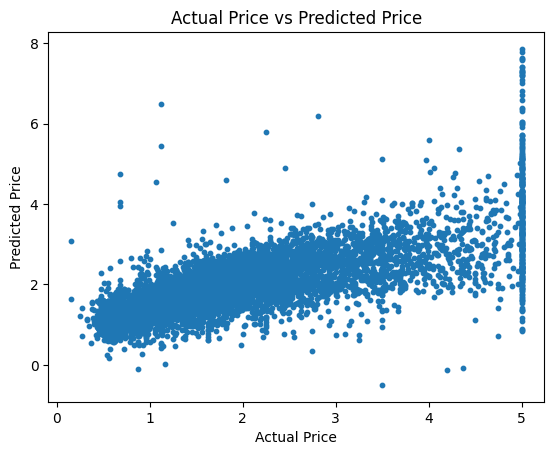

In [26]:
plt.scatter(y_test,reg_pred,s=10)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [27]:
recidual=y_test-reg_pred
recidual

,Price
19449,-0.138060
10452,0.373536
18982,-0.581692
8187,1.388429
15759,2.166064
...,...
11141,-0.236804
7027,-0.315747
20145,0.211813
12545,-0.462528


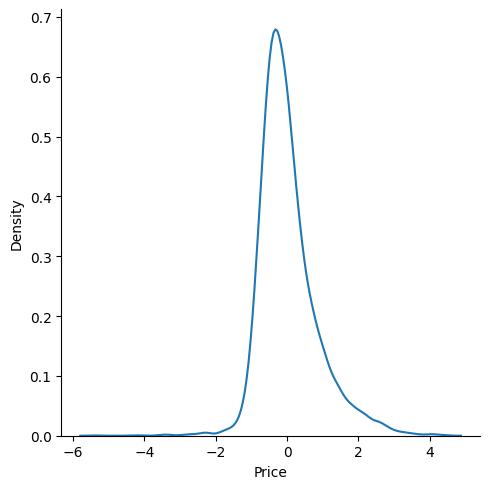

In [28]:
sns.displot(recidual,kind='kde')

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print (mean_squared_error(y_test,reg_pred))


0.6639857297377397


In [61]:
dataset.iloc[0].values

array([  8.3252    ,  41.        ,   6.98412698,   1.02380952,
       322.        ,   2.55555556,   4.526     ])

In [59]:
regression.predict(scaler.transform(X.iloc[0].values.reshape(1, -1)))

array([23.64944015])

In [62]:
import pickle

In [63]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [65]:
pickled_model= pickle.load(open('regmodel.pkl','rb'))

In [67]:
pickled_model.predict(scaler.transform(X.iloc[0].values.reshape(1, -1)))

array([23.64944015])